<a href="https://colab.research.google.com/github/marcinmichalsmolen/adam/blob/main/MGR5_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST / MNIST Fashion - MGR Adam 

In [16]:
!nvidia-smi

Wed Apr 19 12:18:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    27W /  70W |   1887MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

<ipython-input-29-9662f33bbf43>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 4, i+1)


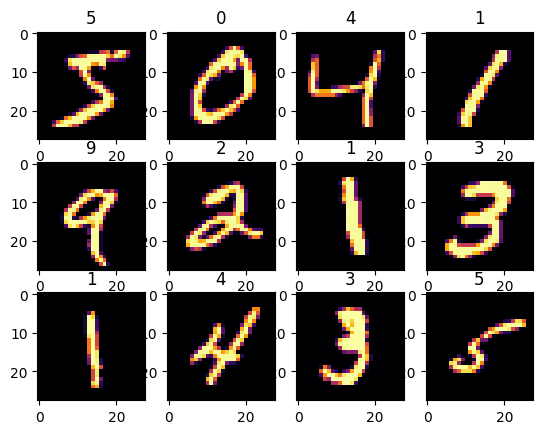

In [29]:
from keras.datasets import mnist as dataset
import numpy as np
(X_train, y_train), (X_test, y_test) = dataset.load_data()
# Rysowanie 12 elementów - etykiety na górze
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')
for i in range(12):
  plt.subplot(3, 4, i+1)
  plt.imshow(X_train[i], cmap='inferno')
  plt.title(y_train[i])
plt.show()

In [30]:
X_train = X_train / 255
X_test = X_test / 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
from keras.utils.np_utils import to_categorical as tk
Y_train = tk(y_train)
Y_test =tk(y_test)

In [31]:
from keras import backend as K
print(K.image_data_format())
print("X_train: {}, y_train: {}", X_train.shape, y_train.shape)
print("X_test: {}, y_test: {}", X_test.shape, y_test.shape)

channels_last
X_train: {}, y_train: {} (60000, 28, 28) (60000,)
X_test: {}, y_test: {} (10000, 28, 28) (10000,)


Przygotowanie sieci

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import tensorflow as tf
insh = (28, 28, 1)

In [33]:
model = Sequential([
  Conv2D(16, kernel_size=(3,3), padding='same',activation='relu', input_shape = insh),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1152)              0         
                                                                 
 dense_6 (Dense)             (None, 10)               

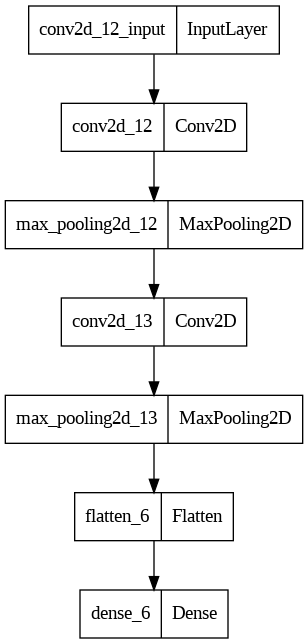

In [34]:
import tensorflow as tf
tf.keras.utils.plot_model(
  model,
  to_file='model.png',
  show_shapes=False,
  show_dtype=False,
  show_layer_names=True,
  rankdir='TB',
  expand_nested=False,
  dpi=96,
  layer_range=None,
  show_layer_activations=False
)

In [35]:
model = Sequential([
  Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=insh),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 800)               0         
                                                                 
 dense_7 (Dense)             (None, 10)               

In [36]:
model = Sequential([
  Conv2D(16, kernel_size=(3,3), padding='same',activation='relu', input_shape = insh),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [38]:
from matplotlib import pyplot
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [40]:
def summarize_diagnostics(history):
  pyplot.title('Dokładność klasyfikacji')
  pyplot.plot(history.history['accuracy'], color='orange', label='train')
  pyplot.plot(history.history['val_accuracy'], color='green', label='test')
  pyplot.subplots_adjust (right=2)
  pyplot.show()

def summarize_diagnostics2(history):
  pyplot.title('Model loss')
  pyplot.plot(history.history['loss'], color='red', label='train')
  pyplot.plot(history.history['val_loss'], color='blue', label='test')
  pyplot.subplots_adjust (right=2)
  pyplot.show()

def run_model(model_number):
  output = model_number.fit(X_train, y_train, epochs=100, batch_size=1024, validation_split=(0.2),callbacks=[callbacks])
  # evaluate model
  _, acc = model_number.evaluate(X_test, y_test)
  print('Accuracy = %.3f' % (acc * 100.0))
  summarize_diagnostics(output)
  summarize_diagnostics2(output)
  return

Trening sieci - 100 epok, batch_size 256.

Epoch 1/100
235/235 [==============================] - 3s 5ms/step - loss: 0.4824 - accuracy: 0.8690
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1203 - accuracy: 0.9642
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0825 - accuracy: 0.9742
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0678 - accuracy: 0.9791
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0582 - accuracy: 0.9820
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0536 - accuracy: 0.9830
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0469 - accuracy: 0.9860
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0432 - accuracy: 0.9868
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0404 - accuracy: 0.9877
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0385 - accura

KeyError: ignored

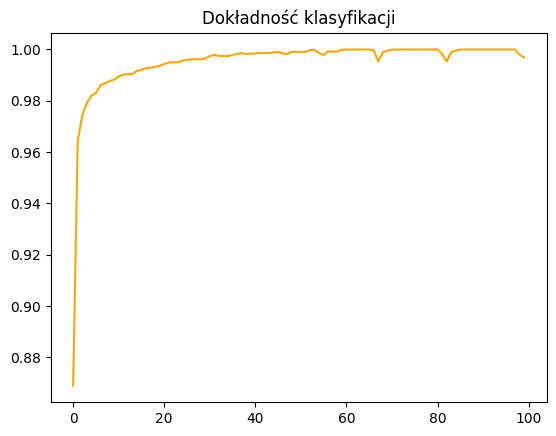

In [41]:
history = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=256,
    epochs=100,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    )
summarize_diagnostics(history)
summarize_diagnostics2(history)

Ewaluacja

In [42]:
train_accuracy = model.evaluate(X_train, Y_train)
test_accuracy = model.evaluate(X_test, Y_test)
print('Dokładności klasyfikacji na materiale treningowym  = ',train_accuracy)
print('dokładności klasyfikacji na materiale testowym  = ',test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0670 - accuracy: 0.9878
Dokładności klasyfikacji na materiale treningowym  =  [0.0025566290132701397, 0.9992333054542542]
dokładności klasyfikacji na materiale testowym  =  [0.06698428094387054, 0.9878000020980835]


Wyniki nieznacznie się różnią, gdyż model radzi sobie lepiej na zbiorze treningowym (na którym się uczył) niż na testowym

: